In [2]:
# seaborn install
# !pip install seaborn

     |████████████████████████████████| 292 kB 1.8 MB/s            


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
my_data = './data/iris_data.csv'

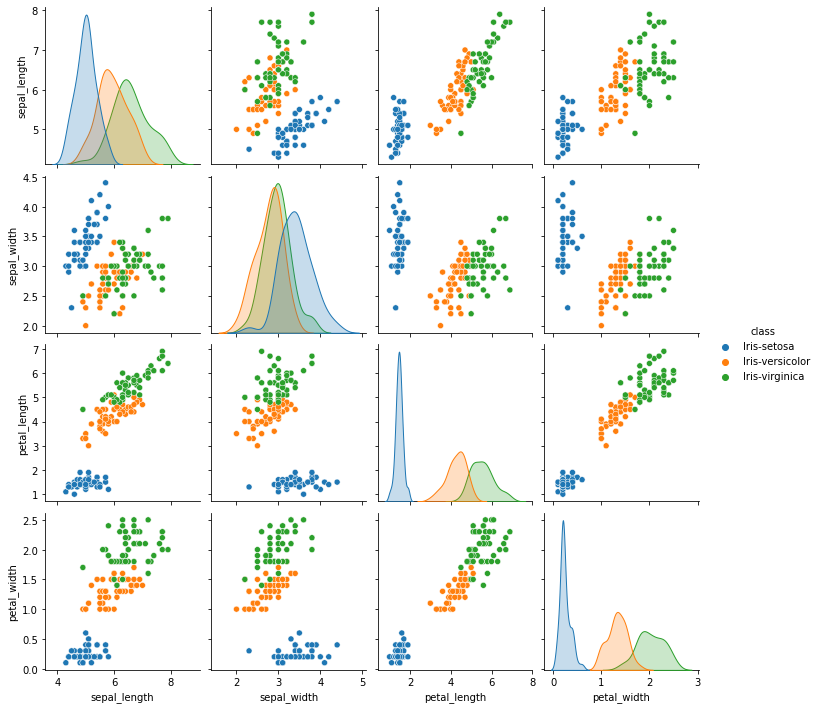

In [7]:
# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)

# 불러온 데이터를 적용합니다. 
df = pd.read_csv(my_data)

# 그래프로 확인
sns.pairplot(df, hue='class');
plt.show()

In [8]:
# 데이터 분류
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

# 모델의 설정
model = Sequential()
model.add(Dense(16,  input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
model.fit(X, Y_encoded, epochs=10, batch_size=1)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))

2021-12-08 17:36:57.925727: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-12-08 17:36:57.925765: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: UNKNOWN ERROR (-1)
2021-12-08 17:36:57.925787: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ws-343-7ffd47d6f9-jv86q): /proc/driver/nvidia/version does not exist
2021-12-08 17:36:57.926117: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-08 17:36:57.933834: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2499995000 Hz
2021-12-08 17:36:57.934258: I tensorflow/compiler/xla/se

Epoch 1/10
150/150 [==============================] - 0s 1ms/step - loss: 1.3259 - accuracy: 0.3333
Epoch 2/10
150/150 [==============================] - 0s 1ms/step - loss: 0.8409 - accuracy: 0.6333
Epoch 3/10
150/150 [==============================] - 0s 1ms/step - loss: 0.7110 - accuracy: 0.7267
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.6867
Epoch 5/10
150/150 [==============================] - 0s 1ms/step - loss: 0.5542 - accuracy: 0.7933
Epoch 6/10
150/150 [==============================] - 0s 1ms/step - loss: 0.4988 - accuracy: 0.9067
Epoch 7/10
150/150 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.9133
Epoch 8/10
150/150 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.9067
Epoch 9/10
150/150 [==============================] - 0s 1ms/step - loss: 0.4006 - accuracy: 0.9267
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.3603 - accuracy: 0.9667

 A